# Incremental build time

RQ1: Does incremental build time outperform the clean build time of a system?

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Will show the incremental build time and the executable's binary size for all system's configurations
path = '/home/xternava/Documents/GitHub/Incremental-build/data/'
#path = '/src/data/'
df = pd.read_csv(path + 'buildtime_di1.csv')
df.columns
df = df.rename(columns = {"bt_real": "Build Time", "BinarySize": "Binary Size"})
df

,Branch,Option,Build Time,bt_user,bt_sys,Binary Size
0,ix264-00001-00006,"['--disable-interlaced', '--bit-depth=all', '-...",65.7162,0.0001,0.0010,2845544
1,ix264-00001-00015,"['--disable-asm', '--bit-depth=all', '--chroma...",33.7739,0.0000,0.0010,2223376
2,ix264-00001-00012,"['--disable-interlaced', '--bit-depth=8', '--c...",37.4592,0.0000,0.0010,1914320
3,ix264-00001-00014,"['--disable-asm', '--disable-thread', '--disab...",18.0090,0.0000,0.0009,1463912
4,ix264-00001-00005,"['--disable-asm', '--disable-interlaced', '--b...",38.4697,0.0000,0.0009,2442528
...,...,...,...,...,...,...
375,ix264-00020-00016,"['--disable-asm', '--disable-gpl', '--disable-...",18.5001,0.0001,0.0008,1554512
376,ix264-00020-00013,"['--disable-asm', '--disable-interlaced', '--b...",20.5980,0.0009,0.0000,1572712
377,ix264-00020-00018,"['--disable-asm', '--disable-gpl', '--disable-...",19.0813,0.0000,0.0010,1564568
378,ix264-00020-00003,"['--disable-asm', '--disable-gpl', '--disable-...",34.2927,0.0000,0.0011,2278824


In [3]:
# For further analyses, the branch names are extracted into separate columns
df[['Br0', 'Br1','Br2']] = df.Branch.str.split("-",expand=True)
df_setindex = df.set_index("Br2")
df = df_setindex[['Br1', 'Branch', 'Build Time', 'Binary Size']]

# The index is reset to incremental build configuration
dx = df.sort_index()
dx

,Br1,Branch,Build Time,Binary Size
Br2,,,,
00001,00012,ix264-00012-00001,38.1588,1913968
00001,00004,ix264-00004-00001,37.6793,1913968
00001,00002,ix264-00002-00001,37.7449,1913968
00001,00005,ix264-00005-00001,37.7126,1913968
00001,00006,ix264-00006-00001,37.9762,1913968
...,...,...,...,...
00020,00005,ix264-00005-00020,37.5796,1914320
00020,00003,ix264-00003-00020,37.6093,1914320
00020,00019,ix264-00019-00020,37.6860,1914320


In [4]:
# A detailed view of each incremental build time after clean build configurations
# Columns: clean build
# Rows: Incremental build
opt2 = df.pivot_table(index = ["Br2", "Br1"],
                    values=["Build Time"])
opt2.unstack()

Build Time                                                        \
Br1        00001    00002    00003    00004    00005    00006    00007   
Br2                                                                      
00001        NaN  37.7449  37.8143  37.6793  37.7126  37.9762  37.9055   
00002    38.2078      NaN  38.1965  38.1738  38.2251  38.2686  38.1624   
00003    34.3452  34.4278      NaN  34.3835  34.4219  34.3376  34.4753   
00004    69.7883  69.7114  69.7516      NaN  69.8411  69.9453  69.7543   
00005    38.4697  37.8467  37.9128  37.8803      NaN  37.9042  38.0079   
00006    65.7162  65.5675  65.5637  65.8843  65.6980      NaN  65.7186   
00007    21.2786  21.2672  21.2380  21.2735  21.2878  21.2701      NaN   
00008    20.6448  20.6613  20.7174  20.7170  20.6588  20.6646  20.8000   
00009    65.9422  65.9090  65.9721  65.8807  65.8881  65.9977  66.1459   
00010    32.1507  32.0916  32.1191  32.1534  31.9867  32.3065  32.1116   
00011    65.2243  65.2513  65.2393  65.1458  65.1864  65.2559  65.2616   
00012    37.4592  37.5260  37.5502  37.6650  37.5692  37.8315  37.6409   
00013    20.6052  20.7167  20.6747  20.5875  20.5884  20.5538  20.6336   
00014    18.0090  17.9692  17.9033  17.9260  17.9642  17.9109  18.0239   
00015    33.7739  33.8159  33.9403  33.7892  33.8718  33.9143  33.9681   
00016    18.5080  18.5116  18.5562  18.4266  18.5230  18.5395  18.6193   
00017    40.5208  40.3750  40.5266  40.4537  40.3704  40.3594  40.5193   
00018    19.0332  19.0785  19.0769  19.0893  19.1502  19.0725  19.1047   
00019    34.9254  34.9639  34.9818  35.0041  34.9827  35.3054  35.1066   
00020    37.7533  37.3926  37.6093  37.6317  37.5796  37.5257  37.8538   

                                                                               \
Br1      00008    00009    00010    00011    00012    00013    00014    00015   
Br2                                                                             
00001  37.7505  37.7590  37.8763  37.8931  38.1588  37.8262  37.8105  37.7469   
00002  38.1617  38.3158  38.2706  38.1623  38.2170  38.2397  38.2872  38.2280   
00003  34.5113  34.4497  34.5167  34.4229  34.3903  34.4023  34.4404  34.4563   
00004  69.7299  69.7774  69.8456  69.8487  69.6772  69.8391  69.9079  69.8555   
00005  38.0303  38.0602  38.0204  37.9213  37.9897  38.0146  38.0518  37.9418   
00006  65.6237  65.6428  65.7202  65.7875  65.8353  65.7551  65.8260  65.6126   
00007  21.2987  21.2982  21.2612  21.3664  21.3448  21.1999  21.2685  21.3390   
00008      NaN  20.6511  20.8083  20.7140  20.6749  20.7143  20.7943  20.7079   
00009  65.9374      NaN  65.9834  65.8789  66.1105  65.9577  65.8300  65.8254   
00010  32.2459  32.1854      NaN  32.1414  32.1431  32.0882  32.2133  32.0707   
00011  65.1903  65.3147  65.3014      NaN  65.0600  65.1787  65.3316  65.1450   
00012  37.5881  37.5466  37.6338  37.5756      NaN  37.6813  37.6367  37.6079   
00013  20.5477  21.0318  20.6035  20.6552  20.6506      NaN  20.5626  20.5564   
00014  17.9419  17.9376  17.8989  17.9560  17.9840  17.9729      NaN  17.9862   
00015  33.7855  33.8247  33.9955  33.8799  33.8162  33.8463  33.9050      NaN   
00016  18.4525  18.5515  18.5913  18.5530  18.4967  18.5114  18.5584  18.4981   
00017  40.3045  40.3420  40.5533  40.3484  40.3357  40.4033  40.5604  40.4165   
00018  19.0031  19.1293  19.2131  18.9819  18.9762  19.1877  19.2002  19.1229   
00019  34.8579  35.0059  35.0003  34.9001  35.0095  35.0247  35.0240  34.9718   
00020  37.5727  37.8476  37.7150  37.6188  37.7505  37.7372  37.7580  37.5616   

                                                    
Br1      00016    00017    00018    00019    00020  
Br2                                                 
00001  37.6330  37.7994  37.7692  37.8027  37.6417  
00002  38.1772  39.5766  38.0832  38.1929  38.2106  
00003  34.5086  36.0483  34.4658  34.4416  34.2927  
00004  69.8256  69.6871  71.9201  69.6347  70.1801  
00005  37.9717  37.9541  39.1243  37.9726  37.8536  
00006  65.7737 

In [5]:
# A detailed view of each executable's binary size after incremebtal build configurations
# Columns: clean build
# Rows: Incremental build
opt2 = df.pivot_table(index = ["Br2", "Br1"],
                    values=["Binary Size"])
opt2.unstack()

Binary Size                                                         \
Br1         00001      00002      00003      00004      00005      00006   
Br2                                                                        
00001         NaN  1913968.0  1913968.0  1913968.0  1913968.0  1913968.0   
00002   1938720.0        NaN  1938720.0  1938720.0  1938720.0  1938720.0   
00003   2278824.0  2278824.0        NaN  2278824.0  2278824.0  2278824.0   
00004   3047312.0  3047312.0  3047312.0        NaN  3047312.0  3047312.0   
00005   2442528.0  2442528.0  2442528.0  2442528.0        NaN  2442528.0   
00006   2845544.0  2845544.0  2845544.0  2845544.0  2845544.0        NaN   
00007   1601416.0  1601416.0  1601416.0  1601416.0  1601416.0  1601416.0   
00008   1657760.0  1657760.0  1657760.0  1657760.0  1657760.0  1657760.0   
00009   2836352.0  2836352.0  2836352.0  2836352.0  2836352.0  2836352.0   
00010   1749400.0  1749400.0  1749400.0  1749400.0  1749400.0  1749400.0   
00011   2838496.0  2838496.0  2838496.0  2838496.0  2838496.0  2838496.0   
00012   1914320.0  1914320.0  1914320.0  1914320.0  1914320.0  1914320.0   
00013   1572712.0  1572712.0  1572712.0  1572712.0  1572712.0  1572712.0   
00014   1463912.0  1463912.0  1463912.0  1463912.0  1463912.0  1463912.0   
00015   2223376.0  2223376.0  2223376.0  2223376.0  2223376.0  2223376.0   
00016   1554512.0  1554512.0  1554512.0  1554512.0  1554512.0  1554512.0   
00017   2046072.0  2046072.0  2046072.0  2046072.0  2046072.0  2046072.0   
00018   1564568.0  1564568.0  1564568.0  1564568.0  1564568.0  1564568.0   
00019   2281776.0  2281776.0  2281776.0  2281776.0  2281776.0  2281776.0   
00020   1914320.0  1914320.0  1914320.0  1914320.0  1914320.0  1914320.0   

                                                                         \
Br1        00007      00008      00009      00010      00011      00012   
Br2                                                                       
00001  1913968.0  1913968.0  1913968.0  1913968.0  1913968.0  1913968.0   
00002  1938720.0  1938720.0  1938720.0  1938720.0  1938720.0  1938720.0   
00003  2278824.0  2278824.0  2278824.0  2278824.0  2278824.0  2278824.0   
00004  3047312.0  3047312.0  3047312.0  3047312.0  3047312.0  3047312.0   
00005  2442528.0  2442528.0  2442528.0  2442528.0  2442528.0  2442528.0   
00006  2845544.0  2845544.0  2845544.0  2845544.0  2845544.0  2845544.0   
00007        NaN  1601416.0  1601416.0  1601416.0  1601416.0  1601416.0   
00008  1657760.0        NaN  1657760.0  1657760.0  1657760.0  1657760.0   
00009  2836352.0  2836352.0        NaN  2836352.0  2836352.0  2836352.0   
00010  1749400.0  1749400.0  1749400.0        NaN  1749400.0  1749400.0   
00011  2838496.0  2838496.0  2838496.0  2838496.0        NaN  2838496.0   
00012  1914320.0  1914320.0  1914320.0  1914320.0  1914320.0        NaN   
00013  1572712.0  1572712.0  1572712.0  1572712.0  1572712.0  1572712.0   
00014  1463912.0  1463912.0  1463912.0  1463912.0  1463912.0  1463912.0   
00015  2223376.0  2223376.0  2223376.0  2223376.0  2223376.0  2223376.0   
00016  1554512.0  1554512.0  1554512.0  1554512.0  1554512.0  1554512.0   
00017  2046072.0  2046072.0  2046072.0  2046072.0  2046072.0  2046072.0   
00018  1564568.0  1564568.0  1564568.0  1564568.0  1564568.0  1564568.0   
00019  2281776.0  2281776.0  2281776.0  2281776.0  2281776.0  2281776.0   
00020  1914320.0  1914320.0  1914320.0  1914320.0  1914320.0  1914320.0   

                                                                         \
Br1        00013      00014      00015      00016      00017      00018   
Br2                                                                       
00001  1913968.0  1913968.0  1913968.0  1913968.0  1913968.0  1913968.0   
00002  1938720.0  1938720.0  1938720.0  1938720.0  1938720.0  1938720.0   
00003  2278824.0  2278824.0  2278824.0  2278824.0  2278824.0  2278824.0   
00004  3047312.0  3047312.0  3047312.0  3047312.0  3047312.0  3047312.0   
00005 

In [6]:
# The minimum, maximum, and average incremental build time for each system's configuration
ib_results = df.pivot_table(index = "Br2", 
                    values=["Build Time"], # values=["Build Time", "Binary Size"],
                    aggfunc=["max", "mean", "min"],
                    margins=True,
                    margins_name="Total")

ib_results[:-1].to_csv(path + 'incremental-bt.csv', 
                index=True, 
                header=['max', 'mean', 'min'])
ib_results

,max,mean,min
,Build Time,Build Time,Build Time
Br2,,,
00001,38.1588,37.805268,37.6330
00002,39.5766,38.281947,38.0832
00003,36.0483,34.512537,34.2927
00004,71.9201,69.922153,69.6347
00005,39.1243,38.048842,37.8467
00006,67.7977,65.833416,65.5637
00007,22.6720,21.356863,21.1999
00008,21.2239,20.734463,20.6448


In [7]:
sorted_min_ib = ib_results.reindex(ib_results['min'].sort_values(by="Build Time", ascending=False).index)
sorted_min_ib

,max,mean,min
,Build Time,Build Time,Build Time
Br2,,,
00004,71.9201,69.922153,69.6347
00009,66.2411,65.931995,65.7589
00006,67.7977,65.833416,65.5637
00011,65.3316,65.211142,65.0600
00017,41.5502,40.475553,40.3045
00002,39.5766,38.281947,38.0832
00005,39.1243,38.048842,37.8467
00001,38.1588,37.805268,37.6330


<AxesSubplot:xlabel='Configurations', ylabel='incremental build time [s]'>

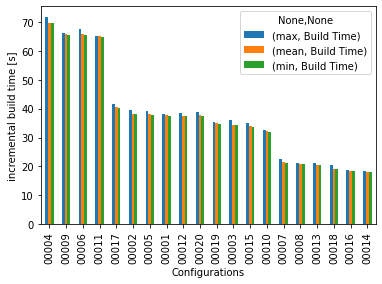

In [8]:
# Visualized the minimum, maxium, and average incremental build time for all configurations
import matplotlib.pyplot as plt

ib_plot = sorted_min_ib.iloc[:-1].plot(kind='bar')

ib_plot.set_xlabel("Configurations")
ib_plot.set_ylabel("incremental build time [s]")

#ib_plot.tight_layout(pad=1.0)
plt.savefig("./figures/fig01.pdf", bbox_inches = 'tight', pad_inches = 0)

ib_plot

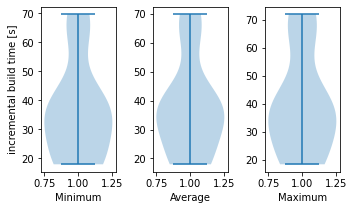

In [9]:
# The minimum, average, and maximum incremental build time summaried for all configurations
import matplotlib.pyplot as plt
 
all_data1 = ib_results['min']
labels1 = 'Minimum'
all_data2 = ib_results['mean']
labels2 = 'Average'
all_data3 = ib_results['max']
labels3 = 'Maximum'
     
plt.rc('font', size=10) 

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(5, 3))

ax1.violinplot(all_data1)
ax1.set_xlabel(labels1)
ax1.set_ylabel("incremental build time [s]")
                    
ax2.violinplot(all_data2)
ax2.set_xlabel(labels2)

ax3.violinplot(all_data3)
ax3.set_xlabel(labels3)

fig.tight_layout(pad=1.0)
plt.savefig("./figures/fig02.pdf", bbox_inches = 'tight', pad_inches = 0)

plt.show()